<a href="https://colab.research.google.com/github/lauratobon/Ai_Porject_2023/blob/main/01%20-%20exploraci%C3%B3n%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import missingno as msno
#bibliotecas de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
import gc

In [ ]:
# install kaggle
!pip install -q kaggle

In [ ]:
#used to upload the kaggle API token json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juandavidarismendy","key":"4df590bf4ce3f6e0a95b9c5e15fb285c"}'}

In [ ]:
# create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
# copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# to list all datasets in kaggle
! kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                             Spotify and Youtube                                 9MB  2023-03-20 15:43:25           8977        328  1.0              
ppb00x/country-gdp                                                Country_GDP                                         7KB  2023-04-07 06:47:36           1370         39  1.0              
erdemtaha/cancer-data                                             Cancer Data                                        49KB  2023-03-22 07:57:00           4150         97  1.0              
omartorres25/honda-data                                     

In [ ]:
!kaggle datasets download -d jessemostipak/hotel-booking-demand

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 90.7MB/s]


In [ ]:
!unzip hotel-booking-demand.zip

Archive:  hotel-booking-demand.zip
  inflating: hotel_bookings.csv      


## **1. Lectura y carga del dataset**

In [ ]:
# upload data
data=pd.read_csv('hotel_bookings.csv')

In [ ]:
# view the dataset
data


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#checking for null values
dict_={}
for feature in data.columns:
    dict_[feature]=data[feature].isnull().sum()
pd.DataFrame(dict_,index=['null_values']).transpose()

,null_values
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
#since company has approximately 95% null values it's better to drop it
data.drop('company',axis=1,inplace=True)

In [ ]:
#for total number of guests
data['Total_guests']=data['adults']+data['children']+data['babies']

In [ ]:
data.shape


(119390, 32)

In [ ]:
#creating a copy of the table to wirk with it 
data_set= data.copy()


In [ ]:
# Se cuentan los valores faltantes de cada columna y se organizan en orden descendente.
# Se muestran las primeras 8 columnas.
data_set.isnull().sum().sort_values(ascending=False)[:8]

agent                 16340
country                 488
Total_guests              4
children                  4
reserved_room_type        0
assigned_room_type        0
booking_changes           0
deposit_type              0
dtype: int64

In [ ]:
data_set

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0


In [ ]:
data_set[data_set['Total_guests']==0].value_counts().sum()

120

In [ ]:
#since it's not possible that someone will make bookings and the number of guests be zero
no_guests=data_set['Total_guests']==0
data_set=data_set[~no_guests]

In [ ]:
#dropping total guests
data_set.drop('Total_guests',axis=1,inplace=True)

<ipython-input-23-efaee4568aa4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set.drop('Total_guests',axis=1,inplace=True)


In [ ]:
# Si el ID de 'agent' o 'company' es nulo, se reemplaza con 0.
data_set[['agent']] = data_set[['agent']].fillna(0.0)

<ipython-input-24-ef08f99a058a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set[['agent']] = data_set[['agent']].fillna(0.0)


In [ ]:
data_set

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
## Para valores faltantes de la columna 'country', se reemplazan por su moda.
data_set['country'].fillna(data_set.country.mode().to_string(), inplace=True)

## Para los valores faltantes de 'children', se reemplazan con su número promedio redondeado.
data_set['children'].fillna(round(data_set.children.mean()), inplace=True)

<ipython-input-26-b76f6b6cdca2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['country'].fillna(data_set.country.mode().to_string(), inplace=True)
<ipython-input-26-b76f6b6cdca2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['children'].fillna(round(data_set.children.mean()), inplace=True)


In [ ]:
data_set.isnull().sum().sort_values(ascending=False)[:8]

hotel                          0
is_repeated_guest              0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
days_in_waiting_list           0
dtype: int64

In [ ]:
#double check of there are not 0 guesses in the dataset
((data_set.adults + data_set.babies + data_set.children)==0).sum()

0

In [ ]:
data_set.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
# Hay algunas columnas con tipos de datos inadecuados.
# Las siguientes columnas se convierten de tipo float a entero:
# {'children', 'company', 'agent'}
data_set[['children', 'agent']] = data_set[['children', 'agent']].astype('int64')

<ipython-input-30-8f8ecf77e793>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set[['children', 'agent']] = data_set[['children', 'agent']].astype('int64')


In [ ]:
data_set.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## **Exploratory Data Analysis**


In [ ]:
#No of unique variables for each columns
dict_={}
for feature in data_set.columns:
    dict_[feature]=data_set[feature].value_counts().shape[0]
pd.DataFrame(dict_,index=['unique_counts']).transpose()

,unique_counts
hotel,2
is_canceled,2
lead_time,479
arrival_date_year,3
arrival_date_month,12
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,33
adults,14


In [ ]:
# Función para obtener los porcentajes de los diferentes valores
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [ ]:
# Función para graficar los porcentajes de los valores únicos de una variable
def plot(x, y, x_label=None, y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    Función para graficar diagramas
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x=x, y=y, ax = ax)
    elif type == 'line':
        sns.lineplot(x=x,y=y, ax = ax, sort=False)
        
    
    plt.show()

x:  [0 1] 
y:  [62.923 37.077]


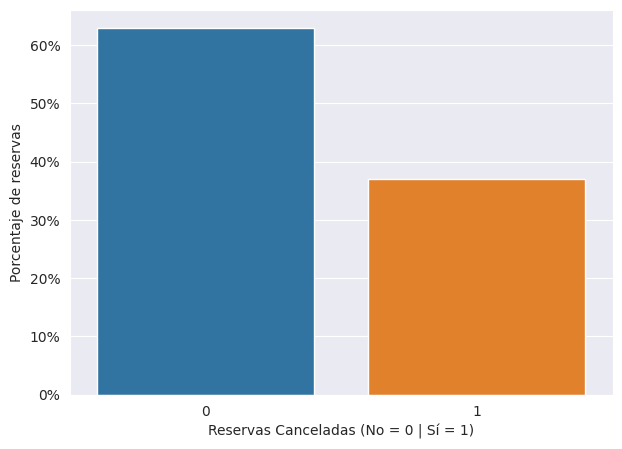

In [ ]:
# x: Valores únicos de la columna 'is_canceled' (x=1, es cancelada / x=0, no cancelada)
# y: Porcentaje de cada valor único de la columna 'is_canceled'
x, y = get_count(data_set['is_canceled'])
print('x: ', x, '\ny: ', np.round_(y, decimals=3))
plot(x, y, x_label='Reservas Canceladas (No = 0 | Sí = 1)', y_label='Porcentaje de reservas')

<Axes: xlabel='market_segment', ylabel='count'>

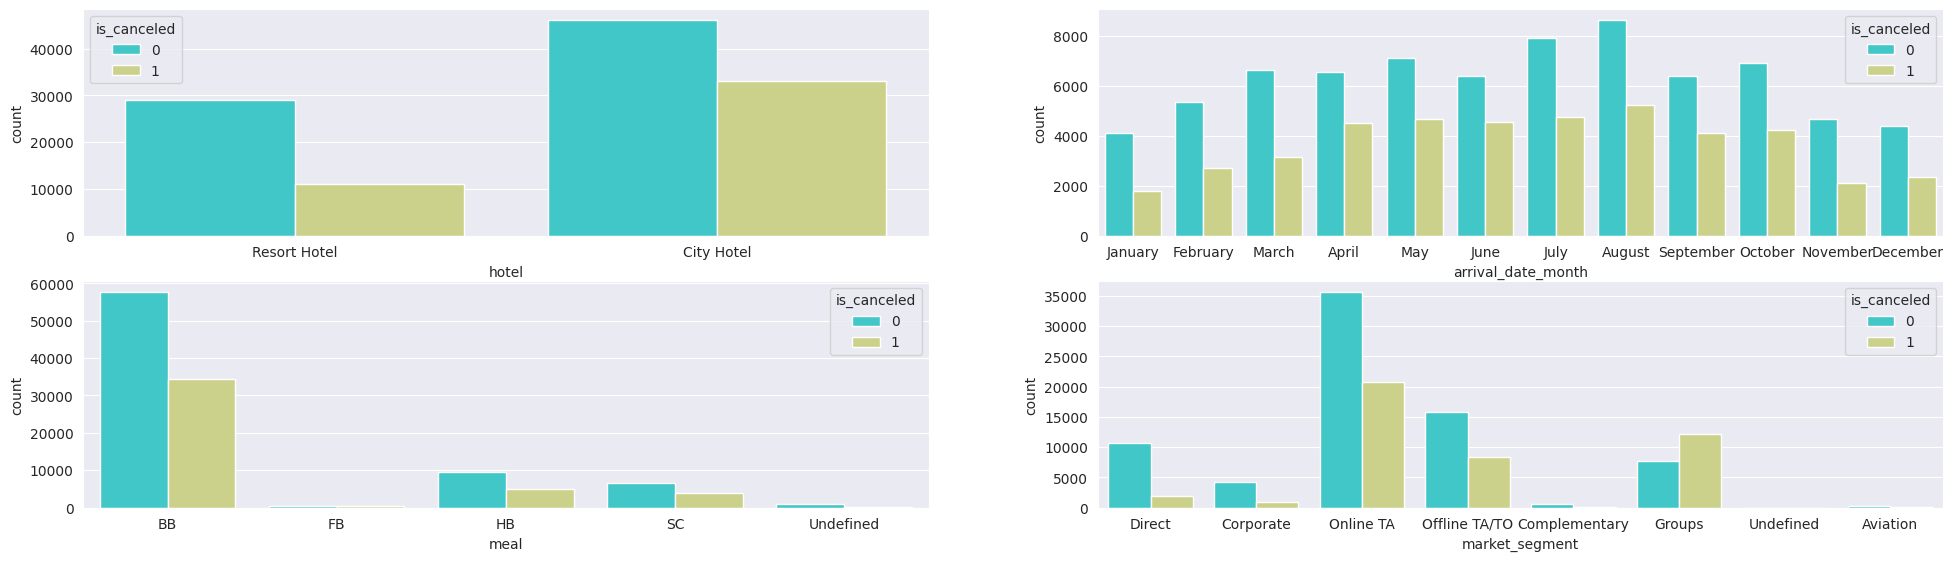

In [ ]:
fig=plt.figure(figsize=(24,10))
ax=[None for _ in range(4)]
ax[0]=plt.subplot2grid((3,2),(0,0))
ax[1]=plt.subplot2grid((3,2),(0,1))
ax[2]=plt.subplot2grid((3,2),(1,0))
ax[3]=plt.subplot2grid((3,2),(1,1))
sns.countplot(x='hotel',data=data_set,ax=ax[0],hue='is_canceled',palette='rainbow')
sns.countplot(x='arrival_date_month',data=data_set,ax=ax[1],hue='is_canceled',palette='rainbow',order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
sns.countplot(x='meal',data=data_set,ax=ax[2],hue='is_canceled',palette='rainbow')
sns.countplot(x='market_segment',data=data_set,ax=ax[3],hue='is_canceled',palette='rainbow')

- The proportion of bookings getting cancelled in city hotel in more than in resorts
- The proportion of ratained cancelled bookings seems to be relatively stable throughout the month
- The bookings with selected meal type 'FB' i.e., Full Board are most likely to get canceled

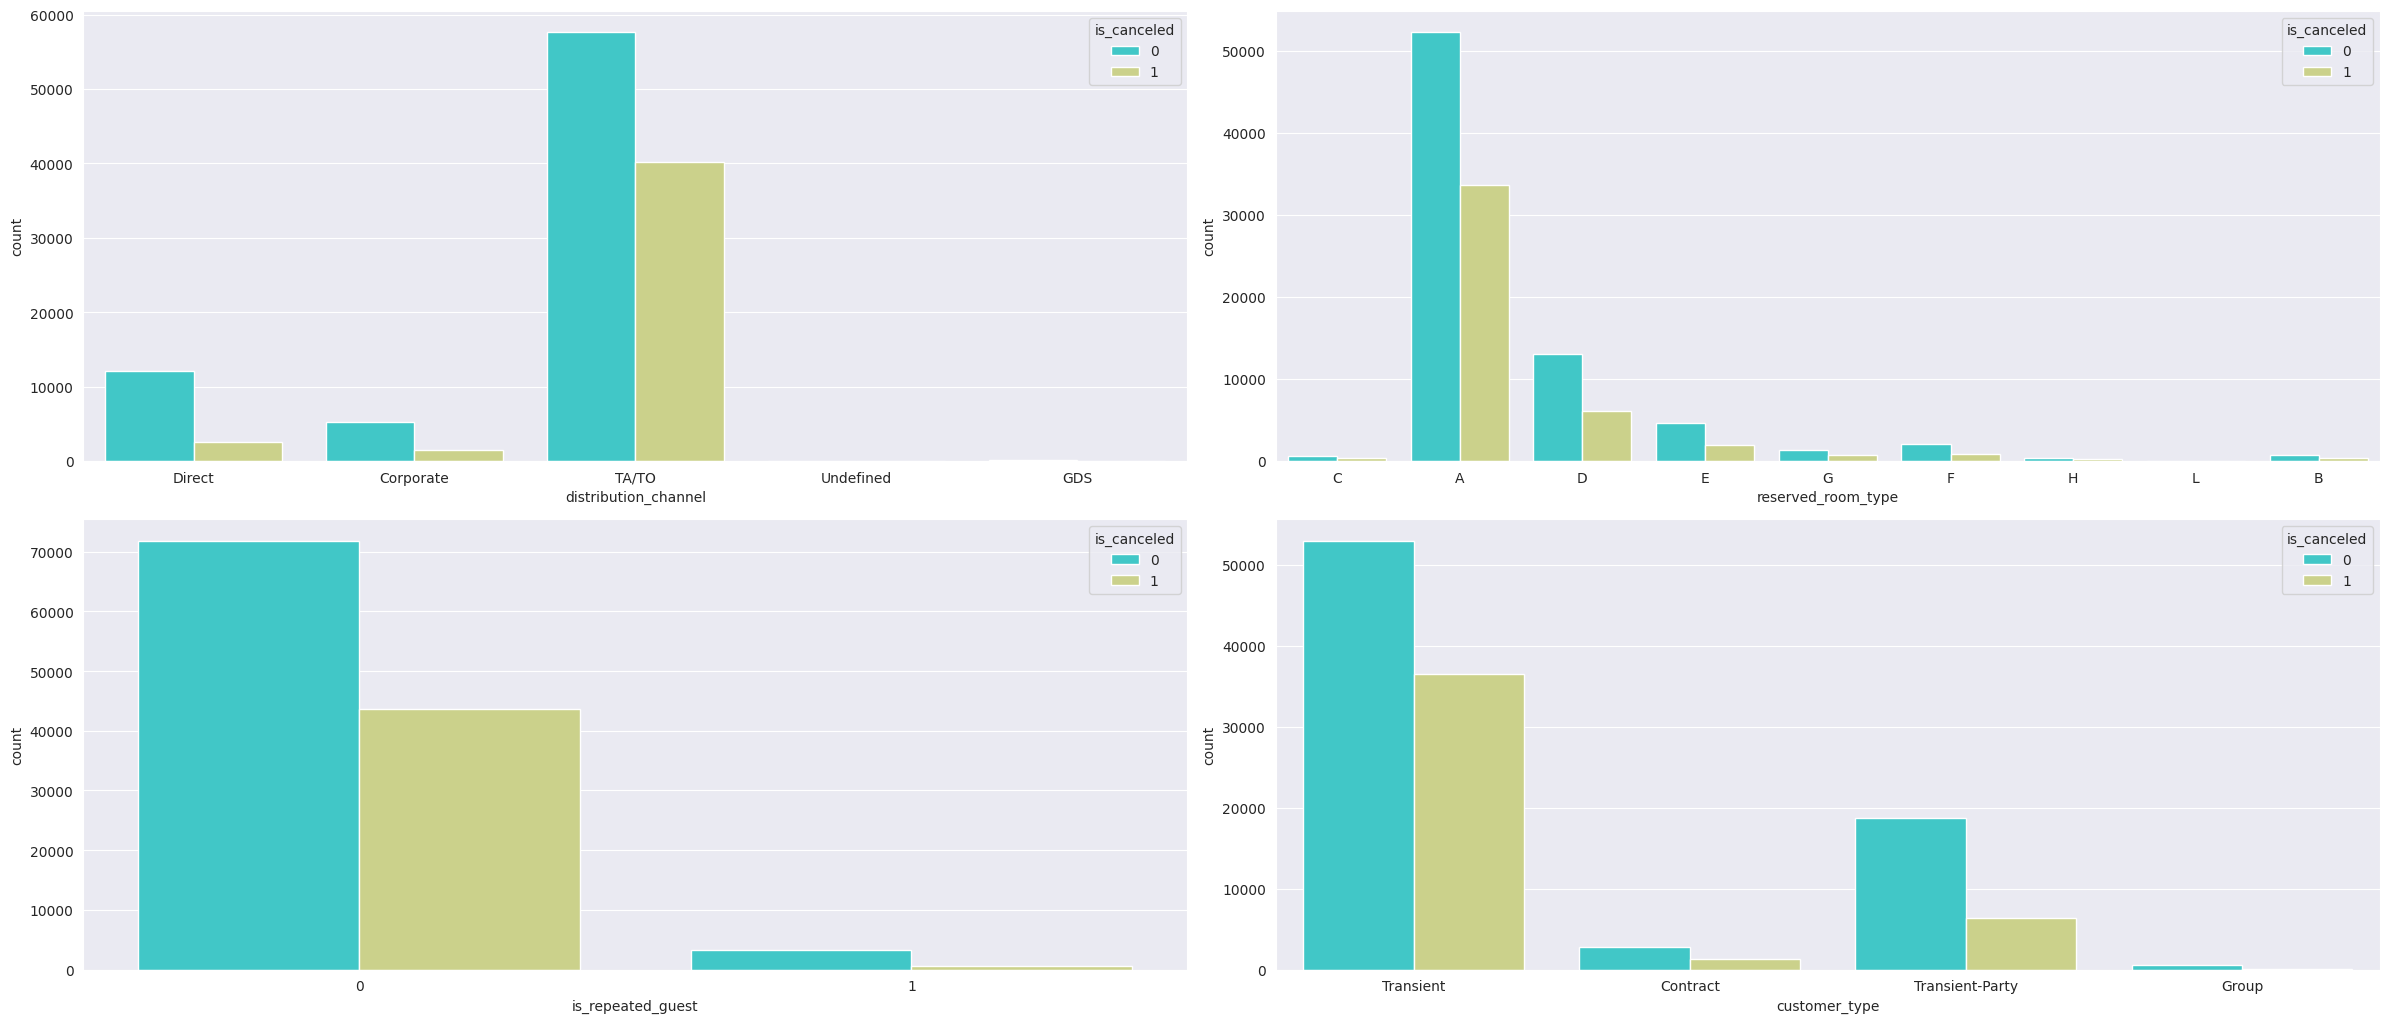

In [ ]:
fig=plt.figure(figsize=(24,15))
ax=[None for _ in range(4)]
ax[0]=plt.subplot2grid((3,2),(0,0))
ax[1]=plt.subplot2grid((3,2),(0,1))
ax[2]=plt.subplot2grid((3,2),(1,0))
ax[3]=plt.subplot2grid((3,2),(1,1))
sns.countplot(x='distribution_channel',data=data_set,ax=ax[0],hue='is_canceled',palette='rainbow')
sns.countplot(x='reserved_room_type',data=data_set,ax=ax[1],hue='is_canceled',palette='rainbow')
sns.countplot(x='is_repeated_guest',data=data_set,ax=ax[2],hue='is_canceled',palette='rainbow')
sns.countplot(x='customer_type',data=data_set,ax=ax[3],hue='is_canceled',palette='rainbow')
plt.tight_layout()

Bookings made through Direct, corporate and GDS channel are typically kept however bookings through TA/TO, retained bookings and cancelled bookings are almost proportional.
Retained and cancelled bookings for different room types are typically proportional.
Repeated guests are much more likely to retain the bookings.

<Axes: xlabel='days_in_waiting_list', ylabel='Density'>

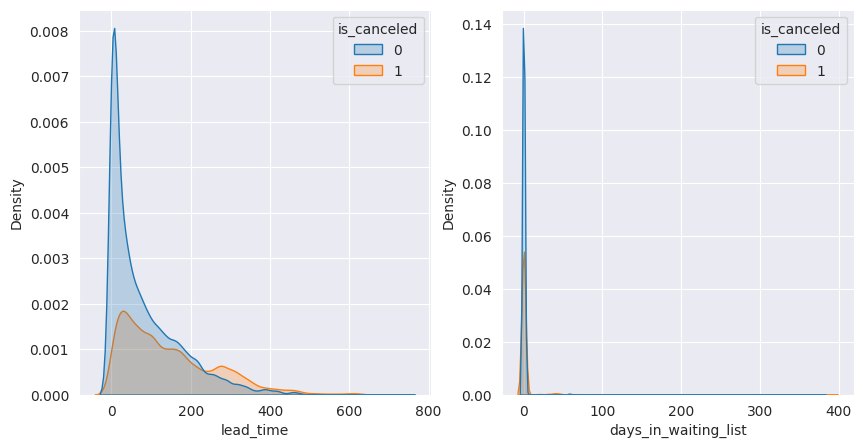

In [ ]:
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,5))
ax[0]=plt.subplot2grid((1,2),(0,0))
ax[1]=plt.subplot2grid((1,2),(0,1))
sns.kdeplot(x='lead_time',data=data_set,hue='is_canceled',fill=True,ax=ax[0])
sns.kdeplot(x='days_in_waiting_list',data=data_set,hue='is_canceled',fill=True,ax=ax[1])

'lead_time' is typically lower for bookings that are retained, this suggests that the sooner the bookings are made customers are less likely to cancel it and lower the days in the 'days_in_waiting_list' less likely the bookings will get canceled

In [ ]:
# Valores del estado de reservación
data_set.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
no_cancelled = data_set[data_set['is_canceled'] == 0]
no_cancelled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07


<ipython-input-41-4a589bcd6b1f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data_set.corr()


<Axes: >

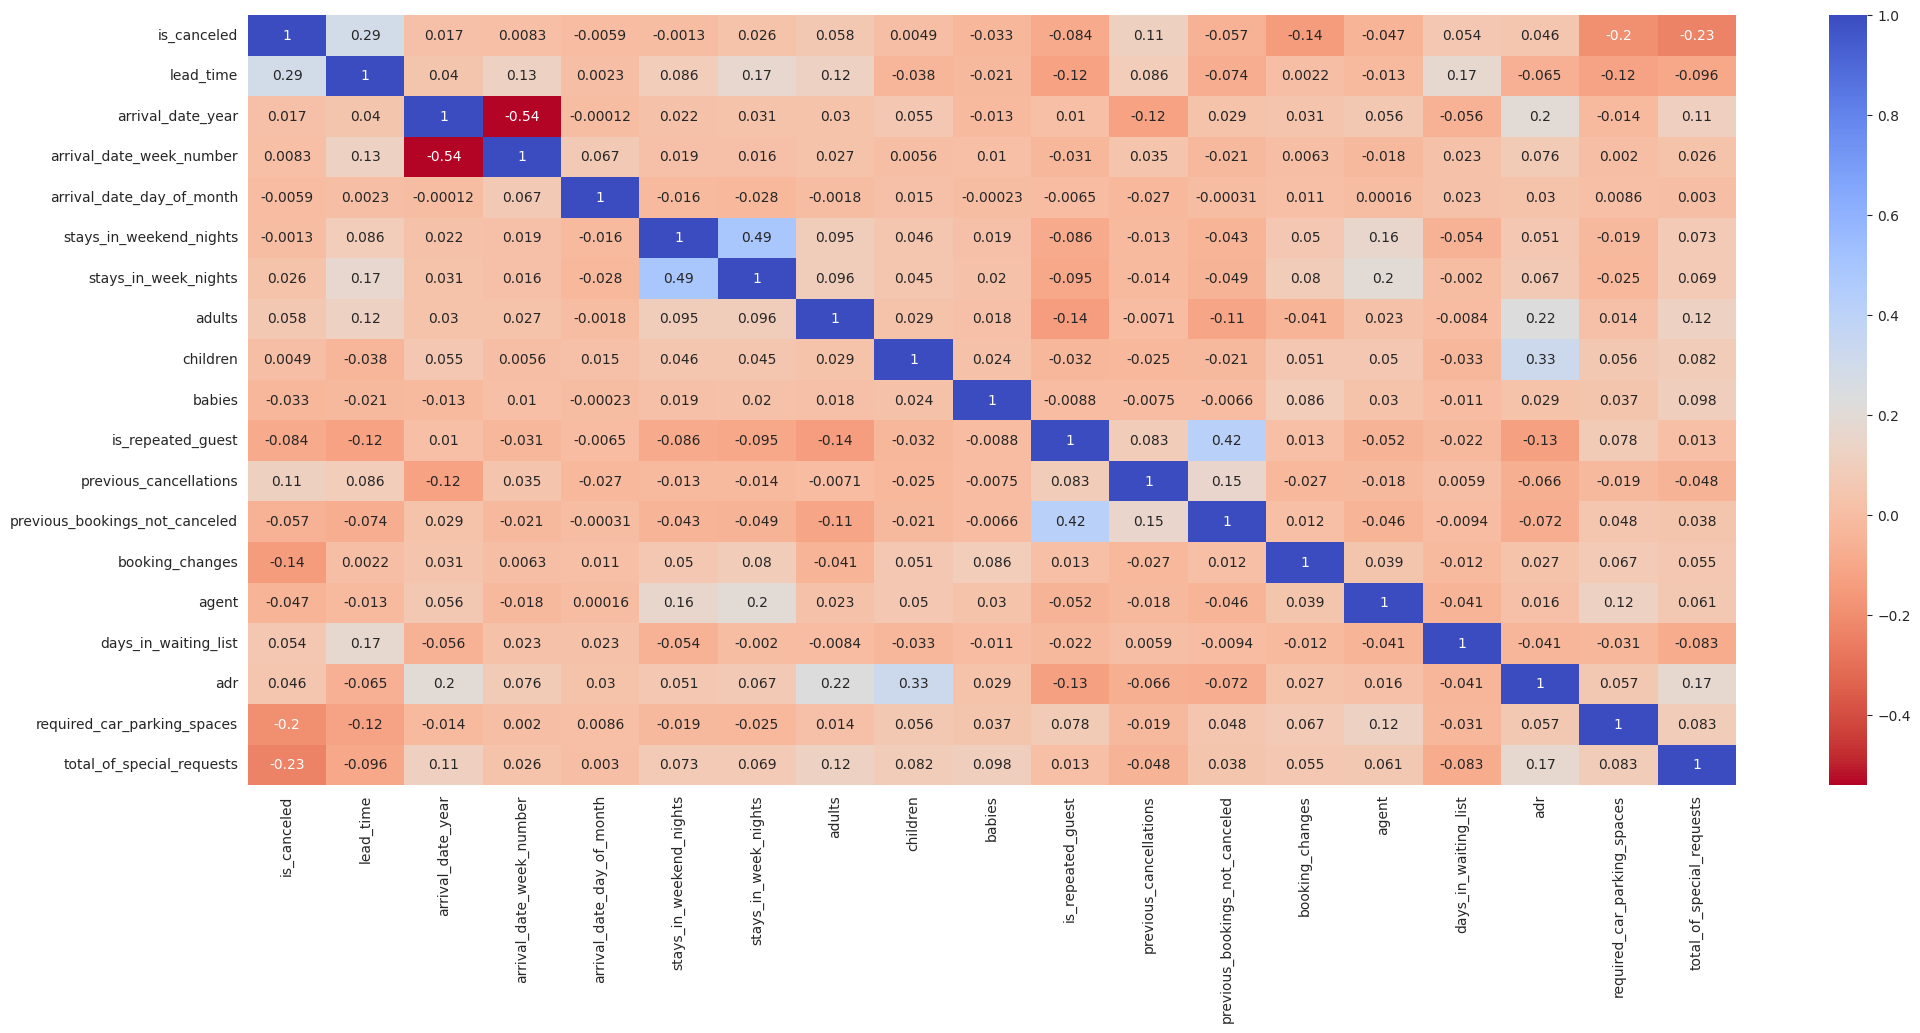

In [ ]:
plt.figure(figsize=(24,10))
corr=data_set.corr()
sns.heatmap(corr,cmap='coolwarm_r',annot=True,annot_kws={'size':10})

# Preparación de los Datos

Antes de pasar los datos por los modelos de *machine learning*, es necesario convertir sus variables categóricas a variables discretas.

In [ ]:
data_set.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
# Listado de variables tipo categóricas de la base de datos
columnas_categoricas = data_set.columns[data_set.dtypes == object]
columnas_categoricas

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [ ]:
# Función para transformar las variables de tipo categórico a tipo discreto

def transform(dataframe):
    
    ## Import LabelEncoder from sklearn
    from sklearn.preprocessing import LabelEncoder
    
    le = LabelEncoder()
    
    ## Select all categorcial features
    categorical_features = list(dataframe.columns[dataframe.dtypes == object])
    
    ## Apply Label Encoding on all categorical features
    return dataframe[categorical_features].apply(lambda x: le.fit_transform(x))

In [ ]:
# Se hace una copia al dataframe
data_set2 = data_set.copy()

# Se transforman las variables de tipo categórico a tipo discreto
data_set2 = transform(data_set2)
print('data_set2.shape:', data_set2.shape)
data_set2.info()

data_set2.shape: (119210, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   hotel                    119210 non-null  int64
 1   arrival_date_month       119210 non-null  int64
 2   meal                     119210 non-null  int64
 3   country                  119210 non-null  int64
 4   market_segment           119210 non-null  int64
 5   distribution_channel     119210 non-null  int64
 6   reserved_room_type       119210 non-null  int64
 7   assigned_room_type       119210 non-null  int64
 8   deposit_type             119210 non-null  int64
 9   customer_type            119210 non-null  int64
 10  reservation_status       119210 non-null  int64
 11  reservation_status_date  119210 non-null  int64
dtypes: int64(12)
memory usage: 11.8 MB


In [ ]:
# Se eliminan las columnas categóricas, para luego agregarle las columnas transformadas.
data_set = data_set.drop(columnas_categoricas, axis=1)

In [ ]:
data_set.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_year               119210 non-null  int64  
 3   arrival_date_week_number        119210 non-null  int64  
 4   arrival_date_day_of_month       119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119210 non-null  int64  
 9   babies                          119210 non-null  int64  
 10  is_repeated_guest               119210 non-null  int64  
 11  previous_cancellations          119210 non-null  int64  
 12  previous_booking

In [ ]:
data_set[columnas_categoricas] = data_set2[columnas_categoricas]
data_set2 = data_set.copy()
data_set2

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,0,342,2015,27,1,0,0,2,0,0,...,0,136,3,1,2,2,0,2,1,121
1,0,737,2015,27,1,0,0,2,0,0,...,0,136,3,1,2,2,0,2,1,121
2,0,7,2015,27,1,0,1,1,0,0,...,0,60,3,1,0,2,0,2,1,122
3,0,13,2015,27,1,0,1,1,0,0,...,0,60,2,0,0,0,0,2,1,122
4,0,14,2015,27,1,0,2,2,0,0,...,0,60,6,3,0,0,0,2,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0,0,...,0,16,5,3,0,0,0,2,1,919
119386,0,102,2017,35,31,2,5,3,0,0,...,0,57,6,3,4,4,0,2,1,920
119387,0,34,2017,35,31,2,5,2,0,0,...,0,44,6,3,3,3,0,2,1,920
119388,0,109,2017,35,31,2,5,2,0,0,...,0,60,6,3,0,0,0,2,1,920


In [ ]:
data_set2.shape

(119210, 12)